# Regression Trees & Random Forest Regression (apartment data)

In this notebook, we will use Regression Tree and Random Forest Regressors to predict rental apartment prices based on various features like living area, number of rooms and more. We will evaluate the models using goodness-of-fit measures like R-squared.

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest


## Import the apartment data

In [ ]:
# Define columns for import
    ### meaning that theese will be the columns that will be imported. Need to match the headers in the CSV file
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("./Data/apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [ ]:
# Create train and test samples
    ###  first df[[]] is the X variables, the second df[] is the y (target) variable
X_train, X_test, y_train, y_test = train_test_split(df[['area', 
                                                        'rooms',
                                                        'pop_dens',
                                                        'mean_taxable_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     area  rooms     pop_dens  mean_taxable_income  dist_supermarket
456   120    6.5   165.018625          65380.98802       1958.318650
6      65    3.5   525.662252         111422.35870        282.095910
362    90    3.5   424.146342          72133.75058       2606.231069
594    63    2.5  1044.628957          70964.08794        564.607066
439    91    3.5   399.525129          62000.54187        646.823905 

y_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the regression tree model

In [4]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=3)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [5]:
# Calculate coefficient of determination
print('R-squared:', round(r2_score(y_test, y_pred), 4))

R-squared: 0.4502


### Print text representation of the regression tree

In [6]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

|--- area <= 99.50
|   |--- pop_dens <= 4269.10
|   |   |--- area <= 77.50
|   |   |   |--- value: [1722.86]
|   |   |--- area >  77.50
|   |   |   |--- value: [2191.39]
|   |--- pop_dens >  4269.10
|   |   |--- area <= 52.50
|   |   |   |--- value: [1893.80]
|   |   |--- area >  52.50
|   |   |   |--- value: [2927.78]
|--- area >  99.50
|   |--- area <= 134.00
|   |   |--- pop_dens <= 3874.83
|   |   |   |--- value: [2672.06]
|   |   |--- pop_dens >  3874.83
|   |   |   |--- value: [3603.59]
|   |--- area >  134.00
|   |   |--- pop_dens <= 1663.59
|   |   |   |--- value: [3391.42]
|   |   |--- pop_dens >  1663.59
|   |   |   |--- value: [4154.83]



### Vizualizing the regression tree

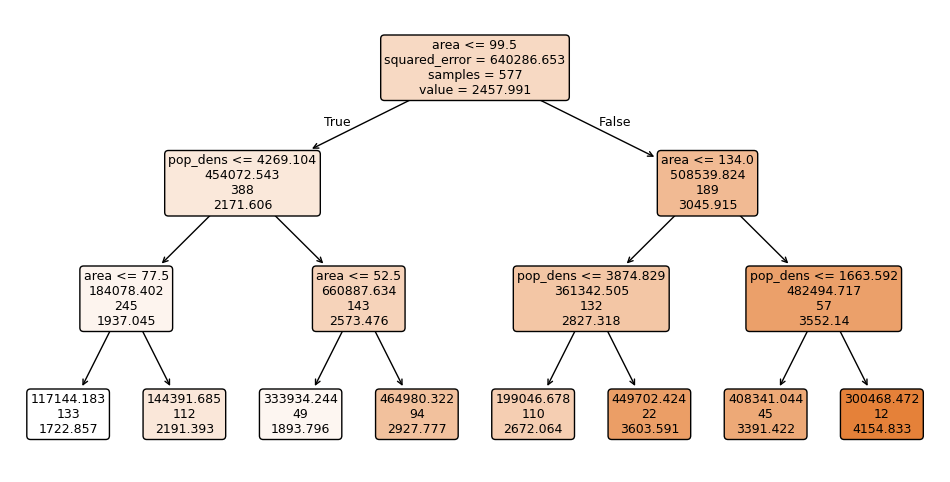

In [7]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [8]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area', 
                                                            'rooms',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area  rooms     pop_dens  mean_taxable_income  dist_supermarket
456   120    6.5   165.018625          65380.98802       1958.318650
6      65    3.5   525.662252         111422.35870        282.095910
362    90    3.5   424.146342          72133.75058       2606.231069
594    63    2.5  1044.628957          70964.08794        564.607066
439    91    3.5   399.525129          62000.54187        646.823905 

y2_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the Random Forest Regression

In [ ]:
    ### Hyper parameters: invited to play with them to improve the R-squared number ### 

    ### n_features= no of independent variables // n_informative= out of the n_features, no of variables with direct impact 
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)

    ### n_estimators= number of trees // max_depth= max depth of the tree //  random_state (seed) should be the same as above for reproducibility
reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
    ### QUESTION: Is this correct? shouldnt it be Y2_train and y2_test?
print('R-squared:', round(reg_rf.score(X2_test, y2_test), 4))

R-squared: 0.5481


### Show feature importance

Index(['area', 'pop_dens', 'dist_supermarket', 'mean_taxable_income', 'rooms'], dtype='object')
[0.56749536 0.16751781 0.11611526 0.09147853 0.05739305]


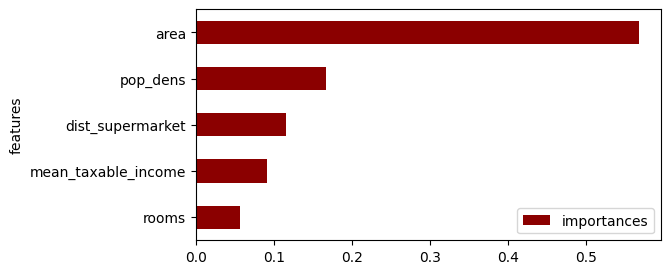

In [ ]:
cols = X2_train.columns

# Derive feature importance from random forest
    ### REVISE this 
importances = reg_rf.feature_importances_
    ### This line calculates the standard deviation of the feature importances across all the individual trees in the Random Forest. It does this by first creating a list of feature importances for each tree (tree.feature_importances_ for tree in reg_rf.estimators_) and then computing the standard deviation along the specified axis (axis=0).###
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
    ### This line sorts the indices of the feature importances in descending order.###
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [11]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-29 13:24:30
Python Version: 3.11.10
-----------------------------------
